##  Final Project - Application of Random Forest

* This data contains the name for 1895 games with 34 of ESRB rating content with the name and console as features for each game.

* A single data point is represented as a binary value 0-1 for Console and a binary vector for the features of ESRB content.

* RP, EC, A, rating is not provided in the current version of the data, it might be included in the next updates.

## Data Acquisition
The data was taken from kaggle: [https://www.kaggle.com/imohtn/video-games-rating-by-esrb]

In [168]:
# import libraries for the project
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_score, recall_score, auc, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import label_binarize
RSEED=50

In [169]:
# load dataset
df = pd.read_csv('/Users/jjimenez/Documents/Estudio/College/George Brown/Semester I/Math Concepts for ML/GBC-MCfML/final_project/data/Video_games_esrb_rating.csv')
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

## Descriptive analysis 

In [171]:
# Selecting numeric columns
df_number = df.select_dtypes('number')
# Transform to categorical type
df_category = df_number.astype('category')
result = df_category.describe().transpose()
freq_1 = pd.Series(result['count'] - result['freq'], name="freq_1").transpose()
result['freq_1'] = freq_1
result.columns=['count','unique','top','freq_0','freq_1'] 
result

,count,unique,top,freq_0,freq_1
console,1895,2,0,994,901
alcohol_reference,1895,2,0,1800,95
animated_blood,1895,2,0,1876,19
blood,1895,2,0,1463,432
blood_and_gore,1895,2,0,1656,239
cartoon_violence,1895,2,0,1858,37
crude_humor,1895,2,0,1792,103
drug_reference,1895,2,0,1829,66
fantasy_violence,1895,2,0,1477,418
intense_violence,1895,2,0,1671,224


In [172]:
# Each column explained by the target
features_dict = {}
for col in df_number:
    features_df = df.groupby('esrb_rating', as_index=False).agg({f'{col}': 'mean'})
    features_df[f'{col}'] = features_df[f'{col}'] * 100
    features_dict[f'{col}'] = features_df

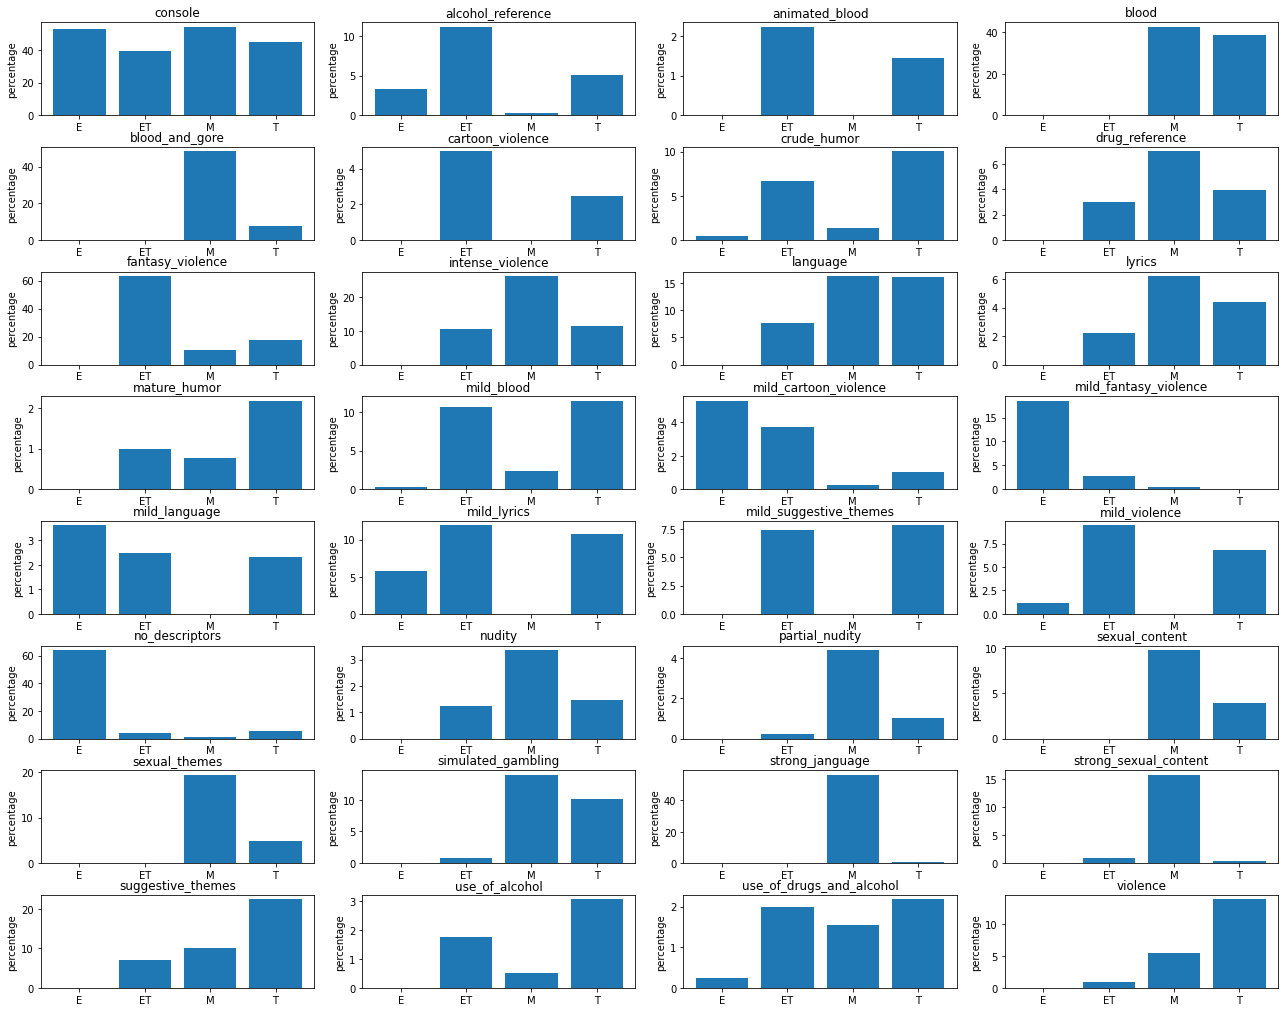

In [173]:
dict_key = list(features_dict.keys())
fig, axs = plt.subplots(8, 4, figsize=(18,14))
fig.tight_layout()

for i, axis in enumerate(axs.reshape(32)):
    data = features_dict[dict_key[i]]
    axis.bar(x=data['esrb_rating'], height=data[f'{dict_key[i]}'])
    axis.title.set_text(dict_key[i])
    axis.set_ylabel('percentage')
    
plt.xlabel = 'Ratings'

## Target exploration

(array([416.,   0.,   0., 403.,   0.,   0., 387.,   0.,   0., 689.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

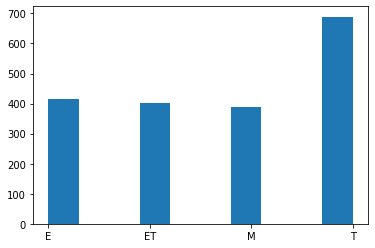

In [174]:
plt.hist(df['esrb_rating'])
# E: Everyone
# ET: Everyone +10years
# M: Mature
# T: Teen

In [175]:
# Count of target variable, categories with similar distribution
df['esrb_rating'].value_counts()

T     689
E     416
ET    403
M     387
Name: esrb_rating, dtype: int64

In [176]:
# Drop the id from dataset
df = df.drop(columns='title')

## Split Data into Training and Testing Set

In [177]:
# Partition of train
X_train = df_number
y_train = df['esrb_rating']

test = pd.read_csv('/Users/jjimenez/Documents/Estudio/College/George Brown/Semester I/Math Concepts for ML/GBC-MCfML/final_project/data/test_esrb.csv')
# Partition of test
y_test = test.iloc[:, -1]
X_test = test.iloc[:, 1:-1]

print(df.shape)
print(test.shape)

(1895, 33)
(500, 34)


In [178]:
# Create the model object
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [179]:
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=50,
                       verbose=1)

In [180]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 527
Average maximum depth 27


In [181]:
train_rf_predictions = model.predict(X_train)
train_rf_probs = model.predict_proba(X_train)[:, 1]

rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [182]:
train_rf_probs

array([0.        , 0.94133333, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [199]:
y_test.unique()

array(['T', 'E', 'ET', 'M'], dtype=object)

In [200]:
y = label_binarize(y_test, classes=['T', 'E', 'ET', 'M'])
n_classes = 4

In [206]:
print(y.shape)
y

(500, 4)


array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [192]:
# classifier
clf = OneVsRestClassifier(model)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s

In [207]:
print(y_score.shape)
y_score

(500, 4)


array([[0.        , 0.00274599, 0.07382815, 0.92342586],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.18759573, 0.65079829, 0.16160597],
       ...,
       [0.        , 0.00934579, 0.91588785, 0.07476636],
       [0.        , 0.90619149, 0.        , 0.09380851],
       [0.        , 0.        , 0.00846813, 0.99153187]])

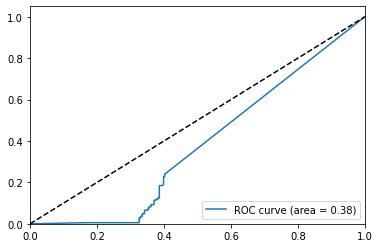

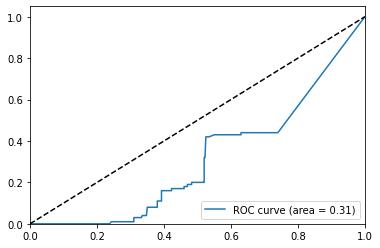

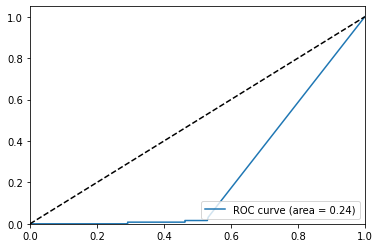

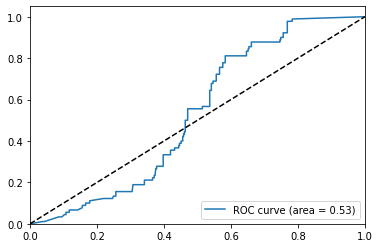

In [203]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [208]:
cm = confusion_matrix(y_test, rf_predictions)
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions, average="weighted")

accuracy, precision

(0.842, 0.8496016944604329)

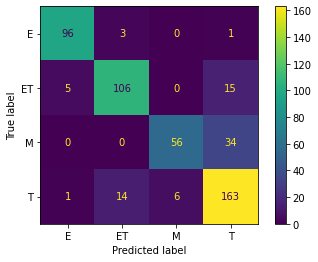

In [210]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()